In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from cmocean import cm 
import numpy as np
import pandas as pd
import cartopy.crs as ccrs

In [2]:
## load the data
chl = xr.open_mfdataset('../data/chl/CHL_*.nc')
# optics = xr.open_dataset('../data/kd_zecchi_2000.nc')
sal = xr.open_mfdataset('../data/salt/salt_*.nc')

In [3]:
def seasonality(data):
    
    season = data.groupby('time.month').mean(dim='time')
    return season

def season_mean(data):

    ss = data['time'].dt.season
    ss_means = data.groupby(ss).mean('time')
    return ss_means

In [4]:
sal_season = season_mean(sal)
chl_season = season_mean(chl)
# sal_season=sal_season.drop_dims(['depth'])

sal_clim = seasonality(sal.isel(depth=0))
chl_clim = seasonality(chl)

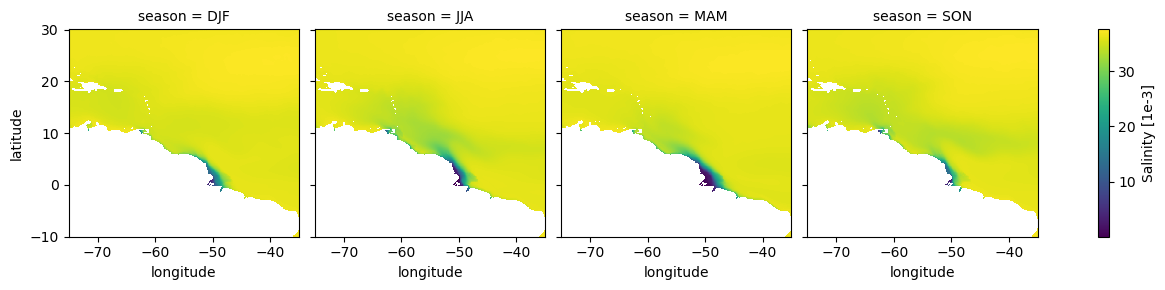

In [5]:
# fig, ax = plt.subplots(ncols=2, nrows=1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(14, 5))
sal_season.so.isel(depth=0).plot(col="season", col_wrap=4)
# chl_season.CHL.plot(col="season", col_wrap=4)

In [6]:
sal_season

<xarray.Dataset> Size: 7MB
Dimensions:    (season: 4, depth: 1, latitude: 481, longitude: 481)
Coordinates:
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 2kB -10.0 -9.917 -9.833 ... 29.83 29.92 30.0
  * longitude  (longitude) float32 2kB -75.0 -74.92 -74.83 ... -35.08 -35.0
  * season     (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    so         (season, depth, latitude, longitude) float64 7MB dask.array<chunksize=(1, 1, 481, 481), meta=np.ndarray>
Attributes: (12/25)
    Conventions:               CF-1.4
    bulletin_date:             2021-07-07 00:00:00
    bulletin_type:             operational
    comment:                   CMEMS product
    domain_name:               GL12
    easting:                   longitude
    ...                        ...
    references:                http://www.mercator-ocean.fr
    source:                    MERCATOR GLORYS12V1
    title:                     daily mean fields from Global Ocean Physics An...
    z_max:                     5727.9169921875
    z_min:                     0.49402499198913574
    copernicusmarine_version:  1.3.5

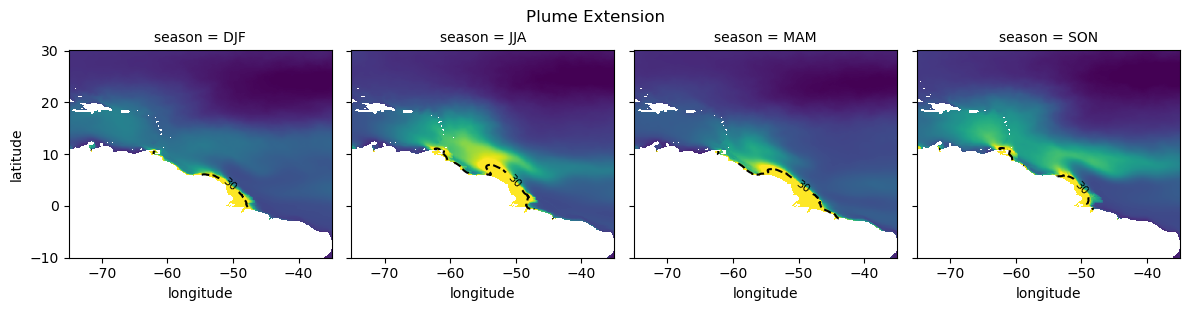

In [7]:
g = sal_season.so.isel(depth=0).plot(col="season", col_wrap=4, robust=True, 
                                     figsize=(12, 3),cmap='viridis_r',add_colorbar=False)

# Add 30 psu contour lines to each subplot
for ax, season in zip(g.axs.flat, sal_season.season.values):  # Use g.axs instead of g.axes
    # Select 2D data for this specific season
    season_data = sal_season.so.isel(depth=0).sel(season=season)
    
    # Squeeze to ensure 2D (remove any singleton dimensions)
    contour_data = season_data.squeeze()
    
    # Plot contour
    cs = ax.contour(
        contour_data.longitude, 
        contour_data.latitude, 
        contour_data,
        levels=[30],
        colors='black',
        linewidths=1.5,
        linestyles='--'
    )
    # Optional: Add contour labels
    ax.clabel(cs, inline=True, fontsize=8, fmt='%.f')

# Adjust layout and add title
plt.suptitle("Plume Extension", y=1.02)
# plt.tight_layout()
# plt.savefig('Figures/Sal_season'+'.png', format='png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

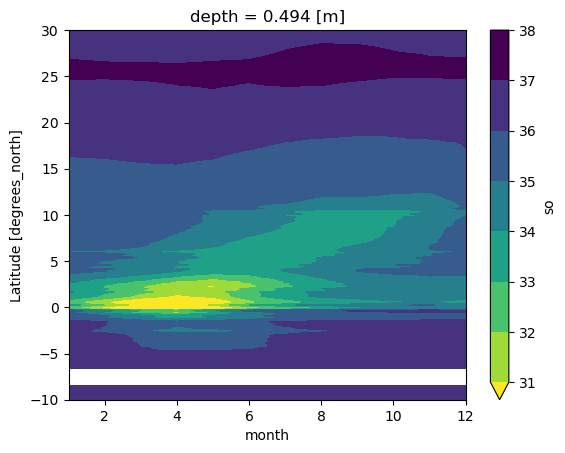

In [8]:
sal_clim.so.mean(dim='longitude').plot.contourf(x='month',y='latitude',cmap='viridis_r',robust=True)

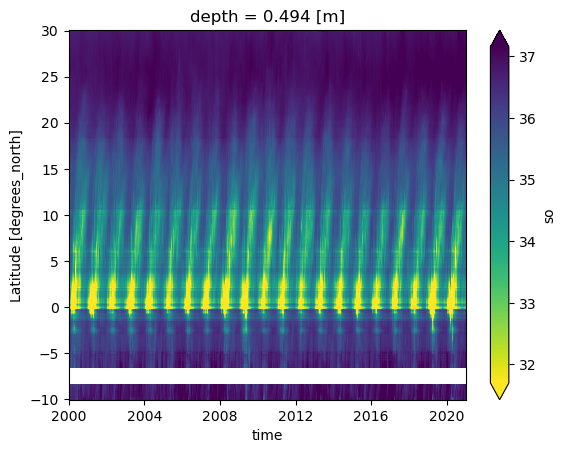

In [8]:
sal.so.mean(dim='longitude').plot(x='time',y='latitude',cmap='viridis_r',robust=True)

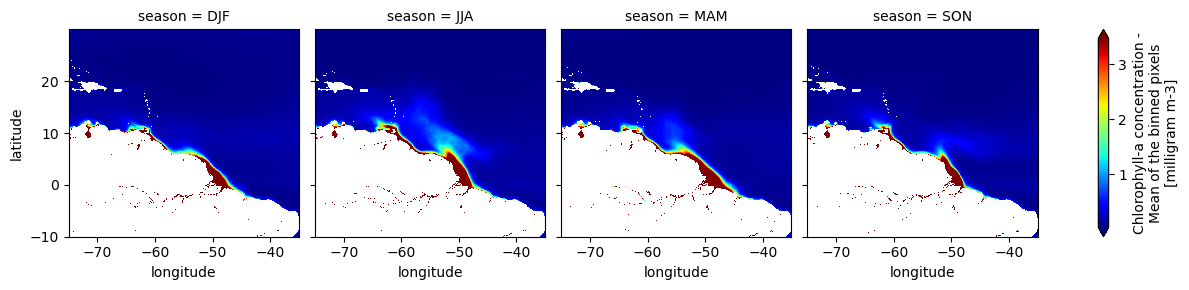

In [9]:
chl_season.CHL.plot(col="season", col_wrap=4,robust=True,cmap='jet')

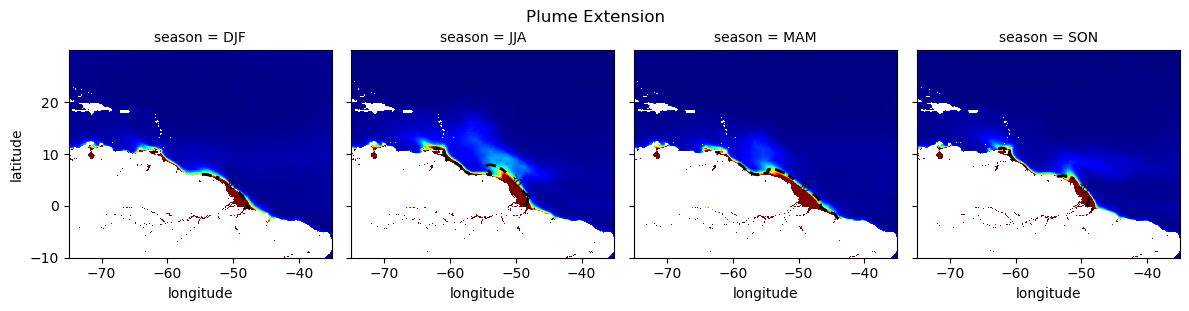

In [10]:
g=chl_season.CHL.plot(col="season", col_wrap=4,robust=True,cmap='jet',
                      figsize=(12, 3), add_colorbar=False)

for ax, season in zip(g.axs.flat, sal_season.season.values):  # Use g.axs instead of g.axes
    # Select 2D data for this specific season
    season_data = sal_season.so.isel(depth=0).sel(season=season)
    
    # Squeeze to ensure 2D (remove any singleton dimensions)
    contour_data = season_data.squeeze()
    
    # Plot contour
    cs = ax.contour(
        contour_data.longitude, 
        contour_data.latitude, 
        contour_data,
        levels=[30],
        colors='black',
        linewidths=2,
        linestyles='--'
    )
    # Optional: Add contour labels
    ax.clabel(cs, inline=True, fontsize=8, fmt='%.f')

# Adjust layout and add title
plt.suptitle("Plume Extension", y=1.02)
# plt.tight_layout()
# plt.savefig('Figures/chl_season'+'.png', format='png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

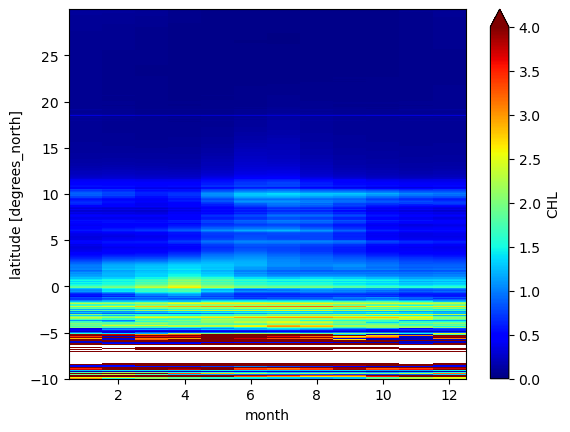

In [12]:
# chl_clim.CHL.mean(dim='longitude').plot(x='month',y='latitude',cmap='jet',robust=True)
chl_clim.CHL.mean(dim='longitude').plot(x='month',y='latitude',cmap='jet',vmin=0,vmax=4)